In [2]:
!pip install qwen-vl-utils
!pip install transformers==4.49
!pip install vllm==0.8.1


[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 120.0 MB/s eta 0:00:00 0:00:01
  Attempting uninstall: transformers
    Found existing installation: transformers 4.52.4
    Uninstalling transformers-4.52.4:
      Successfully uninstalled transformers-4.52.4

[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip


Kernel > Restart Kernel

## 1. 모델 로드

In [1]:
from transformers import AutoProcessor
from vllm import LLM, SamplingParams
from qwen_vl_utils import process_vision_info

MODEL_PATH = "iamjoon/Qwen2-VL-7B-Instruct-fashion-product-images-small-checkpoint-68"

llm = LLM(
    model=MODEL_PATH,
    trust_remote_code=True,
    limit_mm_per_prompt={"image": 10, "video": 10},
)

INFO 06-11 06:07:20 [__init__.py:256] Automatically detected platform cuda.
INFO 06-11 06:07:21 [config.py:2595] Downcasting torch.float32 to torch.float16.
INFO 06-11 06:07:28 [config.py:583] This model supports multiple tasks: {'classify', 'embed', 'generate', 'reward', 'score'}. Defaulting to 'generate'.
INFO 06-11 06:07:28 [config.py:1693] Chunked prefill is enabled with max_num_batched_tokens=8192.
INFO 06-11 06:07:30 [core.py:53] Initializing a V1 LLM engine (v0.8.1) with config: model='iamjoon/Qwen2-VL-7B-Instruct-fashion-product-images-small-checkpoint-68', speculative_config=None, tokenizer='iamjoon/Qwen2-VL-7B-Instruct-fashion-product-images-small-checkpoint-68', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=True, dtype=torch.float16, max_seq_len=32768, download_dir=None, load_format=auto, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


INFO 06-11 06:07:34 [gpu_model_runner.py:1164] Starting to load model iamjoon/Qwen2-VL-7B-Instruct-fashion-product-images-small-checkpoint-68...
WARNING 06-11 06:07:34 [vision.py:97] Current `vllm-flash-attn` has a bug inside vision module, so we use xformers backend instead. You can run `pip install flash-attn` to use flash-attention backend.
INFO 06-11 06:07:34 [config.py:3222] cudagraph sizes specified by model runner [1, 2, 4, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120, 128, 136, 144, 152, 160, 168, 176, 184, 192, 200, 208, 216, 224, 232, 240, 248, 256, 264, 272, 280, 288, 296, 304, 312, 320, 328, 336, 344, 352, 360, 368, 376, 384, 392, 400, 408, 416, 424, 432, 440, 448, 456, 464, 472, 480, 488, 496, 504, 512] is overridden by config [512, 384, 256, 128, 4, 2, 1, 392, 264, 136, 8, 400, 272, 144, 16, 408, 280, 152, 24, 416, 288, 160, 32, 424, 296, 168, 40, 432, 304, 176, 48, 440, 312, 184, 56, 448, 320, 192, 64, 456, 328, 200, 72, 464, 336, 208, 80, 472, 344, 216, 

model-00003-of-00018.safetensors:   0%|          | 0.00/1.76G [00:00<?, ?B/s]

model-00002-of-00018.safetensors:   0%|          | 0.00/2.18G [00:00<?, ?B/s]

model-00005-of-00018.safetensors:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

model-00004-of-00018.safetensors:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

model-00001-of-00018.safetensors:   0%|          | 0.00/1.99G [00:00<?, ?B/s]

model-00006-of-00018.safetensors:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

model-00008-of-00018.safetensors:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

model-00007-of-00018.safetensors:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

model-00009-of-00018.safetensors:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

model-00010-of-00018.safetensors:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

model-00011-of-00018.safetensors:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

model-00012-of-00018.safetensors:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

model-00013-of-00018.safetensors:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

model-00014-of-00018.safetensors:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

model-00015-of-00018.safetensors:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

model-00016-of-00018.safetensors:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

model-00017-of-00018.safetensors:   0%|          | 0.00/2.18G [00:00<?, ?B/s]

model-00018-of-00018.safetensors:   0%|          | 0.00/815M [00:00<?, ?B/s]

INFO 06-11 06:09:11 [weight_utils.py:273] Time spent downloading weights for iamjoon/Qwen2-VL-7B-Instruct-fashion-product-images-small-checkpoint-68: 96.721148 seconds


model.safetensors.index.json:   0%|          | 0.00/56.5k [00:00<?, ?B/s]

Loading safetensors checkpoint shards:   0% Completed | 0/18 [00:00<?, ?it/s]


INFO 06-11 06:09:21 [loader.py:429] Loading weights took 10.06 seconds
INFO 06-11 06:09:21 [gpu_model_runner.py:1176] Model loading took 15.5313 GB and 107.460755 seconds
INFO 06-11 06:09:21 [gpu_model_runner.py:1421] Encoder cache will be initialized with a budget of 16384 tokens, and profiled with 1 image items of the maximum feature size.


chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (327680 > 32768). Running this sequence through the model will result in indexing errors


INFO 06-11 06:10:00 [backends.py:409] Using cache directory: /root/.cache/vllm/torch_compile_cache/7c162d842a/rank_0_0 for vLLM's torch.compile
INFO 06-11 06:10:00 [backends.py:419] Dynamo bytecode transform time: 5.89 s
INFO 06-11 06:10:04 [backends.py:132] Cache the graph of shape None for later use
INFO 06-11 06:10:26 [backends.py:144] Compiling a graph for general shape takes 24.78 s
INFO 06-11 06:10:42 [monitor.py:33] torch.compile takes 30.67 s in total
INFO 06-11 06:10:43 [kv_cache_utils.py:537] GPU KV cache size: 910,736 tokens
INFO 06-11 06:10:43 [kv_cache_utils.py:540] Maximum concurrency for 32,768 tokens per request: 27.79x
INFO 06-11 06:11:12 [gpu_model_runner.py:1499] Graph capturing finished in 29 secs, took 0.49 GiB
INFO 06-11 06:11:13 [core.py:138] init engine (profile, create kv cache, warmup model) took 111.13 seconds


## 2. 테스트 데이터 로드 및 전처리

In [15]:
import io
import json
from PIL import Image
from datasets import load_dataset
from sklearn.model_selection import train_test_split

In [2]:
# 시스템(assistant)에게 주어진 역할
system_message = "당신은 이미지와 제품명(name)으로부터 패션/스타일 정보를 추론하는 분류 모델입니다."

# 실제로 사용자 입력 -> 모델이 답해야 하는 프롬프트
prompt = """입력 정보:
- name: {name}
- image: [image]

위 정보를 바탕으로, 아래 7가지 key에 대한 값을 JSON 형태로 추론해 주세요:
1) gender
2) masterCategory
3) subCategory
4) season
5) usage
6) baseColour
7) articleType

출력 시 **아래 JSON 예시 형태**를 반드시 지키세요:
{{
  "gender": "예시값",
  "masterCategory": "예시값",
  "subCategory": "예시값",
  "season": "예시값",
  "usage": "예시값",
  "baseColour": "예시값",
  "articleType": "예시값"
}}

# 예시
{{
  "gender": "Men",
  "masterCategory": "Accessories",
  "subCategory": "Eyewear",
  "season": "Winter",
  "usage": "Casual",
  "baseColour": "Blue",
  "articleType": "Sunglasses"
}}

# 주의
- 7개 항목 이외의 정보(텍스트, 문장 등)는 절대 포함하지 마세요.
"""

In [3]:
def combine_cols_to_label(example):
    # 실제 컬럼명에 맞게 수정
    label_dict = {
        "gender": example["gender"],
        "masterCategory": example["masterCategory"],
        "subCategory": example["subCategory"],
        "season": example["season"],
        "usage": example["usage"],
        "baseColour": example["baseColour"],
        "articleType": example["articleType"],
    }
    example["label"] = json.dumps(label_dict, ensure_ascii=False)
    return example

def format_data(sample):
   # Image.Image를 PngImageFile로 변환
   buffer = io.BytesIO()
   sample["image"].save(buffer, format='PNG')
   buffer.seek(0)
   image = Image.open(buffer)
   
   return {
       "messages": [
           {
               "role": "system",
               "content": [
                   {
                       "type": "text",
                       "text": system_message
                   }
               ],
           },
           {
               "role": "user",
               "content": [
                   {
                       "type": "text",
                       "text": prompt.format(name=sample["productDisplayName"]),
                   },
                   {
                       "type": "image",
                       "image": image,
                   }
               ],
           },
           {
               "role": "assistant",
               "content": [
                   {
                       "type": "text",
                       "text": sample["label"],
                   }
               ],
           },
       ],
   }

In [8]:
dataset = load_dataset("ashraq/fashion-product-images-small", split="train")
dataset_add_label = dataset.map(combine_cols_to_label)
dataset_add_label = dataset_add_label.shuffle(seed=4242)

In [13]:
formatted_dataset = [format_data(row) for row in dataset_add_label]

In [16]:
# test_size=0.9로 설정하여 전체 데이터의 90%를 테스트 세트로 분리
train_dataset, test_dataset = train_test_split(formatted_dataset,
                                             test_size=0.9,
                                             random_state=42)

## 3. 임의의 샘플 한 개 인퍼런스

In [74]:
from IPython.display import display

In [17]:
model_id = "Qwen/Qwen2-VL-7B-Instruct"
processor = AutoProcessor.from_pretrained(model_id)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [18]:
sampling_params = SamplingParams(
    temperature=0.1,
    top_p=0.001,
    repetition_penalty=1.05,
    max_tokens=256,
    stop_token_ids=[],
)

테스트 데이터 32번에 대해서 모델의 예측을 얻어봅시다.

In [66]:
test_sample = test_dataset[32]["messages"]

In [67]:
test_sample_prompt = processor.apply_chat_template(
    test_sample,
    tokenize=False,
    add_generation_prompt=False,
)

In [68]:
def split_input_and_label(prompt):
    input = prompt.split('<|im_start|>assistant')[0] + '<|im_start|>assistant'
    label = prompt.split('<|im_start|>assistant')[1]
    return input, label

In [79]:
test_sample_input, test_sample_label = split_input_and_label(test_sample_prompt)

In [80]:
print(test_sample_input)

<|im_start|>system
당신은 이미지와 제품명(name)으로부터 패션/스타일 정보를 추론하는 분류 모델입니다.<|im_end|>
<|im_start|>user
입력 정보:
- name: Colorbar Exclusive Nail Lacquer 19
- image: [image]

위 정보를 바탕으로, 아래 7가지 key에 대한 값을 JSON 형태로 추론해 주세요:
1) gender
2) masterCategory
3) subCategory
4) season
5) usage
6) baseColour
7) articleType

출력 시 **아래 JSON 예시 형태**를 반드시 지키세요:
{
  "gender": "예시값",
  "masterCategory": "예시값",
  "subCategory": "예시값",
  "season": "예시값",
  "usage": "예시값",
  "baseColour": "예시값",
  "articleType": "예시값"
}

# 예시
{
  "gender": "Men",
  "masterCategory": "Accessories",
  "subCategory": "Eyewear",
  "season": "Winter",
  "usage": "Casual",
  "baseColour": "Blue",
  "articleType": "Sunglasses"
}

# 주의
- 7개 항목 이외의 정보(텍스트, 문장 등)는 절대 포함하지 마세요.
<|vision_start|><|image_pad|><|vision_end|><|im_end|>
<|im_start|>assistant


In [81]:
print(test_sample_label)


{"gender": "Women", "masterCategory": "Personal Care", "subCategory": "Nails", "season": "Spring", "usage": "Casual", "baseColour": "Blue", "articleType": "Nail Polish"}<|im_end|>



In [82]:
# 이미지만 따로 전처리
test_sample_image_inputs, test_sample_video_inputs = process_vision_info(test_sample)

In [83]:
test_sample_image_inputs

[<PIL.Image.Image image mode=RGB size=56x84>]

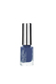

In [84]:
display(test_sample_image_inputs[0])

In [85]:
# 아무 값도 없음
video_inputs

In [86]:
mm_data = {}
if image_inputs is not None:
    mm_data["image"] = image_inputs
if video_inputs is not None:
    mm_data["video"] = video_inputs

llm_inputs = {
    "prompt": test_sample_input,
    "multi_modal_data": mm_data,
}

In [88]:
outputs = llm.generate([llm_inputs], sampling_params=sampling_params)
generated_text = outputs[0].outputs[0].text

print('모델의 예측:')
print(generated_text.strip())

print('레이블:')
print(test_sample_label.strip())

Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  1.41it/s, est. speed input: 438.60 toks/s, output: 74.98 toks/s]

모델의 예측:
{"gender": "Women", "masterCategory": "Personal Care", "subCategory": "Nails", "season": "Spring", "usage": "Casual", "baseColour": "Blue", "articleType": "Nail Polish"}
레이블:
{"gender": "Women", "masterCategory": "Personal Care", "subCategory": "Nails", "season": "Spring", "usage": "Casual", "baseColour": "Blue", "articleType": "Nail Polish"}<|im_end|>


## 4. 다수의 데이터 호출

In [89]:
# 상위 50개 테스트 데이터 추출
test_samples = test_dataset[:50]

# 배치 인퍼런스를 위한 입력 데이터 준비
batch_inputs = []
batch_labels = []

for sample in test_samples:
    # 각 샘플의 메시지 처리
    messages = sample["messages"]
    
    # 프롬프트 생성
    prompt = processor.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=False,
    )
    
    # 입력과 레이블 분리
    input_part = prompt.split('<|im_start|>assistant')[0] + '<|im_start|>assistant'
    label_part = prompt.split('<|im_start|>assistant')[1]
    
    # 이미지/비디오 데이터 처리
    image_inputs, video_inputs = process_vision_info(messages)
    
    # 멀티모달 데이터 구성
    mm_data = {}
    if image_inputs is not None:
        mm_data["image"] = image_inputs
    if video_inputs is not None:
        mm_data["video"] = video_inputs
    
    # LLM 입력 데이터 구성
    llm_input = {
        "prompt": input_part,
        "multi_modal_data": mm_data,
    }
    
    batch_inputs.append(llm_input)
    batch_labels.append(label_part)

# 배치 인퍼런스 실행
print("배치 인퍼런스 시작...")
outputs = llm.generate(batch_inputs, sampling_params=sampling_params)

# 결과 출력
print("\n=== 배치 인퍼런스 결과 ===")
for i, output in enumerate(outputs):
    generated_text = output.outputs[0].text
    print(f"\n--- 샘플 {i+1} ---")
    print(f"모델의 예측: {generated_text.strip()}")
    print(f"레이블: {batch_labels[i].strip()}")
    print("-" * 50)

배치 인퍼런스 시작...


Processed prompts: 100%|██████████| 50/50 [00:00<00:00, 52.56it/s, est. speed input: 16276.92 toks/s, output: 2776.55 toks/s]


=== 배치 인퍼런스 결과 ===

--- 샘플 1 ---
모델의 예측: {"gender": "Women", "masterCategory": "Apparel", "subCategory": "Dress", "season": "Summer", "usage": "Casual", "baseColour": "Beige", "articleType": "Dresses"}
레이블: {"gender": "Women", "masterCategory": "Apparel", "subCategory": "Dress", "season": "Winter", "usage": "Casual", "baseColour": "Beige", "articleType": "Dresses"}<|im_end|>
--------------------------------------------------

--- 샘플 2 ---
모델의 예측: {"gender": "Women", "masterCategory": "Accessories", "subCategory": "Bags", "season": "Summer", "usage": "Casual", "baseColour": "Copper", "articleType": "Clutches"}
레이블: {"gender": "Women", "masterCategory": "Accessories", "subCategory": "Bags", "season": "Summer", "usage": "Casual", "baseColour": "Copper", "articleType": "Clutches"}<|im_end|>
--------------------------------------------------

--- 샘플 3 ---
모델의 예측: {"gender": "Men", "masterCategory": "Apparel", "subCategory": "Topwear", "season": "Summer", "usage": "Casual", "baseColour": "B

## 5. 모델 평가 (테스트 데이터 50건)

In [91]:
import json
from sklearn.metrics import f1_score
from collections import defaultdict

def calculate_f1_scores(outputs, batch_labels):
    """각 key별로 F1 score를 계산하는 함수"""
    
    # 각 키별로 예측값과 실제값을 저장할 딕셔너리
    predictions_by_key = defaultdict(list)
    labels_by_key = defaultdict(list)
    
    for i, output in enumerate(outputs):
        # 모델 예측 결과 파싱
        try:
            pred_text = output.outputs[0].text.strip()
            pred_json = json.loads(pred_text)
        except:
            print(f"샘플 {i+1}: 예측 결과 JSON 파싱 실패")
            continue
        
        # 실제 레이블 파싱
        try:
            label_text = batch_labels[i].strip()
            # <|im_end|> 제거
            if label_text.endswith('<|im_end|>'):
                label_text = label_text[:-10]
            label_json = json.loads(label_text)
        except:
            print(f"샘플 {i+1}: 레이블 JSON 파싱 실패")
            continue
        
        # 각 키별로 예측값과 실제값 저장
        for key in label_json.keys():
            if key in pred_json:
                predictions_by_key[key].append(pred_json[key])
                labels_by_key[key].append(label_json[key])
            else:
                print(f"샘플 {i+1}: 키 '{key}' 예측 결과에 없음")
    
    # 각 키별로 F1 score 계산
    f1_scores = {}
    for key in labels_by_key.keys():
        if len(labels_by_key[key]) > 0:
            # 고유한 라벨들 확인
            unique_labels = list(set(labels_by_key[key] + predictions_by_key[key]))
            
            if len(unique_labels) == 1:
                # 모든 값이 동일한 경우
                f1_scores[key] = 1.0
            else:
                # F1 score 계산 (macro average)
                f1_scores[key] = f1_score(
                    labels_by_key[key], 
                    predictions_by_key[key], 
                    labels=unique_labels,
                    average='macro',
                    zero_division=0
                )
    
    return f1_scores, predictions_by_key, labels_by_key

# F1 score 계산 실행
f1_results, preds_by_key, labels_by_key = calculate_f1_scores(outputs, batch_labels)

# 결과 출력
print("\n=== F1 Score 결과 ===")
print(f"{'Key':<15} {'F1 Score':<10} {'샘플 수':<8}")
print("-" * 35)

for key, score in f1_results.items():
    sample_count = len(labels_by_key[key])
    print(f"{key:<15} {score:.4f}     {sample_count}")

# 전체 평균 F1 score
if f1_results:
    avg_f1 = sum(f1_results.values()) / len(f1_results)
    print("-" * 35)
    print(f"{'평균 F1':<15} {avg_f1:.4f}")

# 각 키별 상세 결과 (옵션)
print("\n=== 상세 결과 ===")
for key in f1_results.keys():
    correct = sum(1 for p, l in zip(preds_by_key[key], labels_by_key[key]) if p == l)
    total = len(labels_by_key[key])
    accuracy = correct / total if total > 0 else 0
    print(f"{key}: 정확도 {accuracy:.4f} ({correct}/{total})")


=== F1 Score 결과 ===
Key             F1 Score   샘플 수    
-----------------------------------
gender          1.0000     50
masterCategory  1.0000     50
subCategory     1.0000     50
season          0.7099     50
usage           0.8880     50
baseColour      0.8899     50
articleType     1.0000     50
-----------------------------------
평균 F1           0.9268

=== 상세 결과 ===
gender: 정확도 1.0000 (50/50)
masterCategory: 정확도 1.0000 (50/50)
subCategory: 정확도 1.0000 (50/50)
season: 정확도 0.6800 (34/50)
usage: 정확도 0.9600 (48/50)
baseColour: 정확도 0.9400 (47/50)
articleType: 정확도 1.0000 (50/50)
